In [128]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [129]:
def split_name_text(text_data):

    # Initialise a list
    entries = []

    # Extract the name and text part from each line
    for line in text_data:
        parts = line.split('/')
        if len(parts) >= 3:
            name = parts[2]
            entries.append(name)
    

    entries_df = pd.DataFrame(entries, columns=['Names'])
    entries_df.drop_duplicates(inplace=True)
    entries = entries_df['Names'].tolist()

    # Return list
    return entries

In [130]:
def average_wc(name, text_data):
    sum = 0
    count = 0
    average = 0

    for line in text_data:
        parts = line.split()
        text_num = parts[0]
        parts = line.split('/')
        if len(parts) >= 3:
            text_name = parts[2]

            if name == text_name:
                sum += int(text_num)
                count += 1

    average = round(sum/count)

    return average

In [131]:
text_files = ['./word_counts_2000.text', './word_counts_2001.text', './word_counts_2002.text']
all_wc = []
for text_file in text_files:
    year_array = []
    with open(text_file, 'r') as file:
        text_data = file.readlines()

        name_text = split_name_text(text_data)

        file_name = os.path.basename(text_file)
        array_name = os.path.splitext(file_name)[0]

        for name in name_text:
            avg_wc = average_wc(name, text_data)
            entry = {'Name:': name, 'Word Count': avg_wc}
            year_array.append(entry)
            dict_entry = {'Year': array_name, 'Name': name, 'WC': avg_wc}
            all_wc.append(dict_entry)
        
print(all_wc)



[{'Year': 'word_counts_2000', 'Name': 'allen-p', 'WC': 172}, {'Year': 'word_counts_2000', 'Name': 'arnold-j', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'arora-h', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'badeer-r', 'WC': 321}, {'Year': 'word_counts_2000', 'Name': 'bailey-s', 'WC': 153}, {'Year': 'word_counts_2000', 'Name': 'bass-e', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'baughman-d', 'WC': 349}, {'Year': 'word_counts_2000', 'Name': 'beck-s', 'WC': 285}, {'Year': 'word_counts_2000', 'Name': 'brawner-s', 'WC': 165}, {'Year': 'word_counts_2000', 'Name': 'buy-r', 'WC': 203}, {'Year': 'word_counts_2000', 'Name': 'campbell-l', 'WC': 268}, {'Year': 'word_counts_2000', 'Name': 'carson-m', 'WC': 111}, {'Year': 'word_counts_2000', 'Name': 'cash-m', 'WC': 301}, {'Year': 'word_counts_2000', 'Name': 'corman-s', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'cuilla-m', 'WC': 205}, {'Year': 'word_counts_2000', 'Name': 'dasovich-j', 'WC': 449}, {'Year': 'word_counts_2000'

In [132]:
df = pd.DataFrame(all_wc)
df['Year'] = df['Year'].str.replace('word_counts_', '')
df.notnull()
print(df)

     Year             Name    WC
0    2000          allen-p   172
1    2000         arnold-j   199
2    2000          arora-h   199
3    2000         badeer-r   321
4    2000         bailey-s   153
5    2000           bass-e   335
6    2000       baughman-d   349
7    2000           beck-s   285
8    2000        brawner-s   165
9    2000            buy-r   203
10   2000       campbell-l   268
11   2000         carson-m   111
12   2000           cash-m   301
13   2000         corman-s   335
14   2000         cuilla-m   205
15   2000       dasovich-j   449
16   2000          davis-d   271
17   2000           dean-c  1086
18   2000       delainey-d   282
19   2000        derrick-j   351
20   2000        donohoe-t   359
21   2000        dorland-c   105
22   2000          ermis-f   460
23   2000         farmer-d   209
24   2000         fossum-d   343
25   2000            gay-r   235
26   2000        germany-c   192
27   2000   gilbertsmith-d   236
28   2000          giron-d   227
29   2000 

In [133]:
pivot_df = df.pivot_table(index='Name', columns='Year', values='WC')
#pivot_df = pivot_df.round().astype('Int64')
pivot_df = pivot_df.dropna()

print(pivot_df)

Year               2000   2001    2002
Name                                  
allen-p           172.0  245.0   138.0
arnold-j          199.0  374.0   162.0
arora-h           199.0  398.0   143.0
badeer-r          321.0   40.0   256.0
bailey-s          153.0  253.0   221.0
bass-e            335.0  337.0   426.0
baughman-d        349.0  364.0   506.0
beck-s            285.0  303.0   338.0
brawner-s         165.0  365.0   332.0
buy-r             203.0  253.0   321.0
campbell-l        268.0  354.0   197.0
carson-m          111.0  536.0   313.0
cash-m            301.0  398.0   841.0
corman-s          335.0  386.0   318.0
cuilla-m          205.0  661.0  2863.0
dasovich-j        449.0  781.0   432.0
dean-c           1086.0  391.0   205.0
delainey-d        282.0  277.0   145.0
dorland-c         105.0  263.0   516.0
ermis-f           460.0  511.0  1560.0
farmer-d          209.0  221.0   338.0
germany-c         192.0  254.0   307.0
gilbertsmith-d    236.0  257.0   295.0
giron-d           227.0  

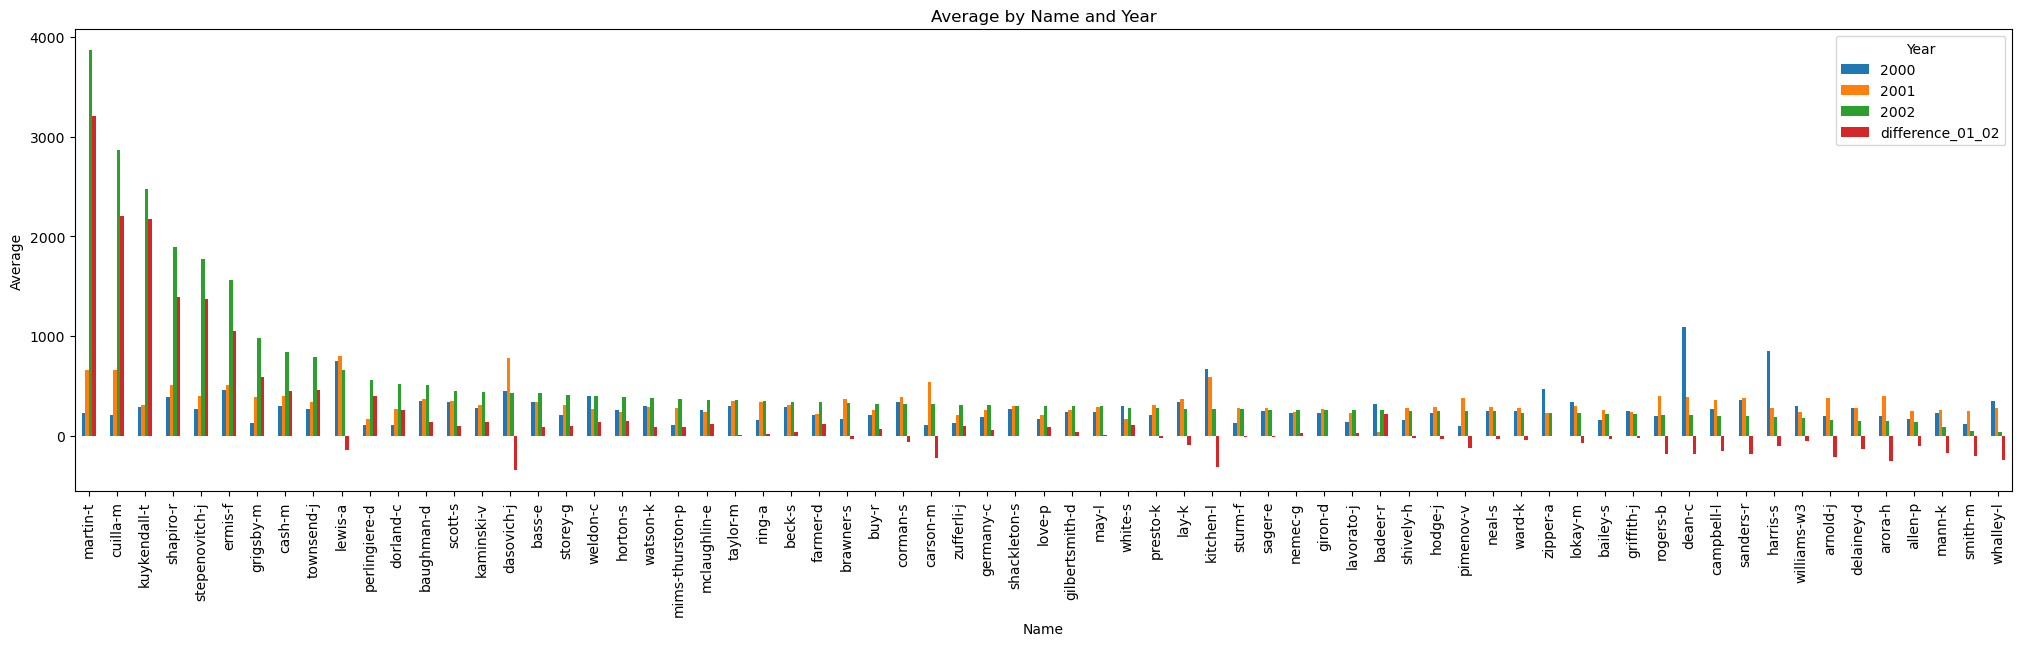

In [139]:
pivot_df_sorted = pivot_df.sort_values(by='2002', ascending=False)

pivot_df_sorted.plot(kind='bar', figsize=(25, 6))
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')
plt.legend(title='Year')
plt.show()

In [135]:
pivot_df['difference_01_02'] = pivot_df['2002']-pivot_df['2001']

print(pivot_df)

Year               2000   2001    2002  difference_01_02
Name                                                    
allen-p           172.0  245.0   138.0            -107.0
arnold-j          199.0  374.0   162.0            -212.0
arora-h           199.0  398.0   143.0            -255.0
badeer-r          321.0   40.0   256.0             216.0
bailey-s          153.0  253.0   221.0             -32.0
bass-e            335.0  337.0   426.0              89.0
baughman-d        349.0  364.0   506.0             142.0
beck-s            285.0  303.0   338.0              35.0
brawner-s         165.0  365.0   332.0             -33.0
buy-r             203.0  253.0   321.0              68.0
campbell-l        268.0  354.0   197.0            -157.0
carson-m          111.0  536.0   313.0            -223.0
cash-m            301.0  398.0   841.0             443.0
corman-s          335.0  386.0   318.0             -68.0
cuilla-m          205.0  661.0  2863.0            2202.0
dasovich-j        449.0  781.0 

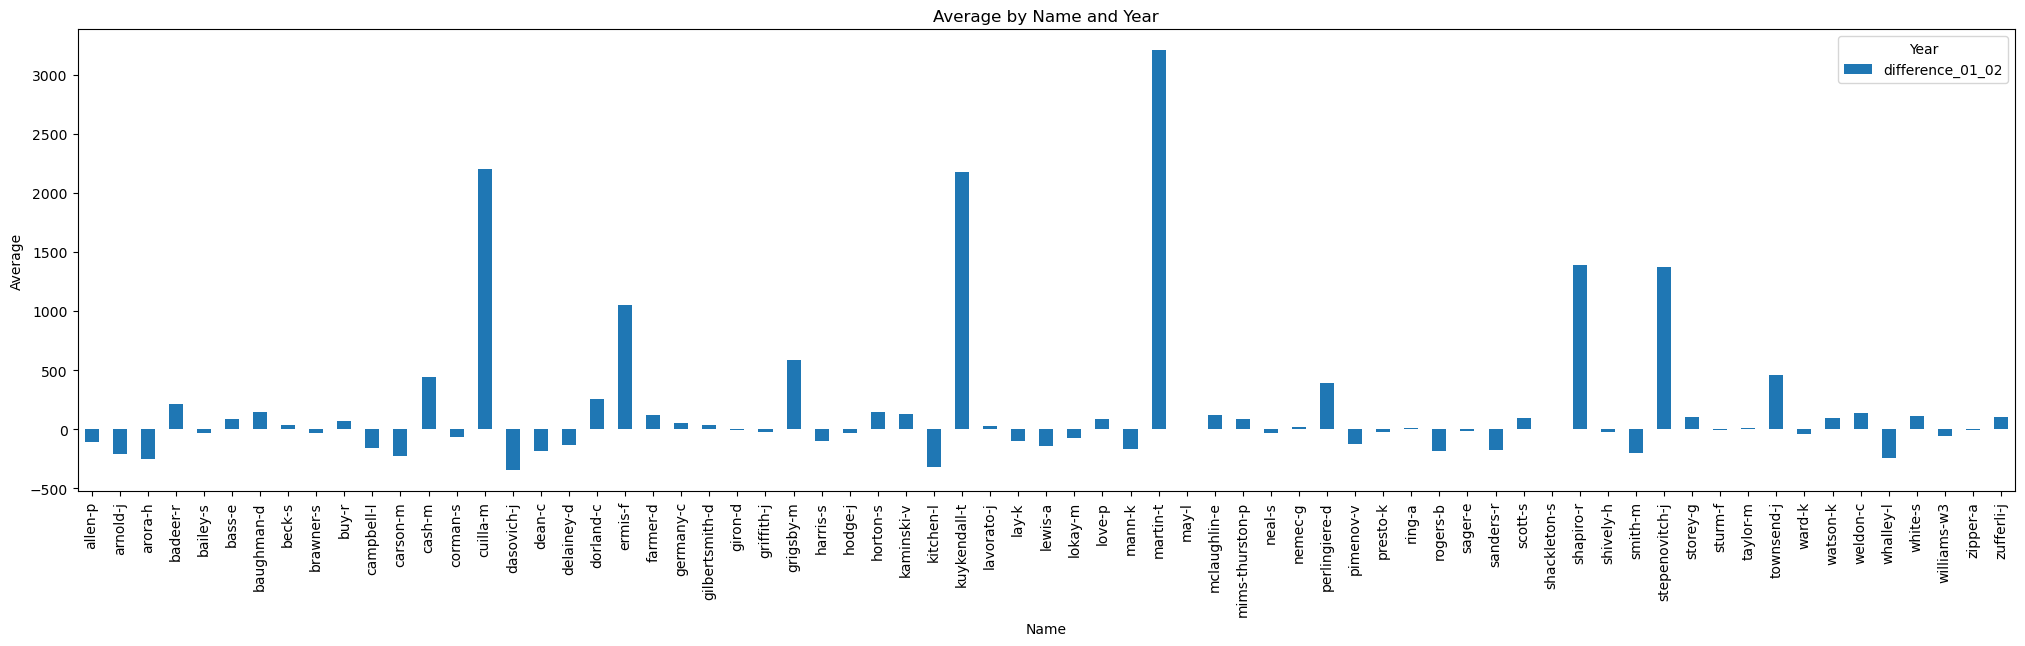

In [136]:
pivot_df['difference_01_02'].plot(kind='bar', figsize=(25, 6))
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')
plt.legend(title='Year')
plt.show()

In [137]:
count = 0
sum = 0

for number in pivot_df['difference_01_02']:
    sum += number
    count += 1
average = sum/count

print(average)

169.5072463768116


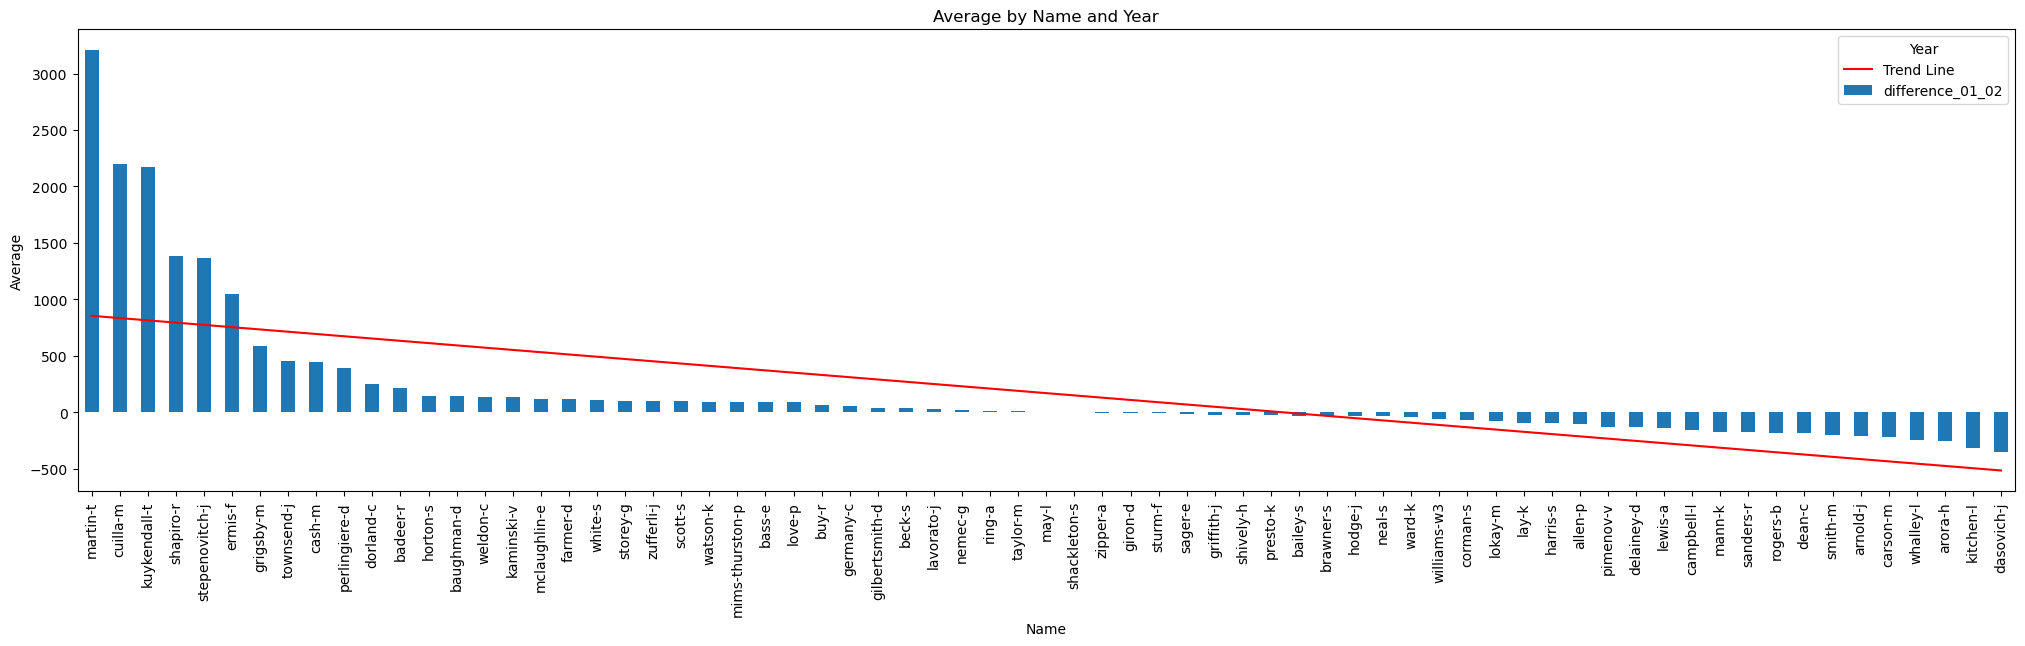

In [138]:
# Sort the DataFrame by the values in the 'difference_01_02' column
pivot_df_sorted = pivot_df.sort_values(by='difference_01_02', ascending=False)

# Plot the sorted bar chart
pivot_df_sorted['difference_01_02'].plot(kind='bar', figsize=(25, 6))

# Fit a trend line (linear regression)
x = np.arange(len(pivot_df_sorted))
y = pivot_df_sorted['difference_01_02'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')

# Show the legend with a title
plt.legend(title='Year')

# Show the plot
plt.show()